In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
import itertools
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

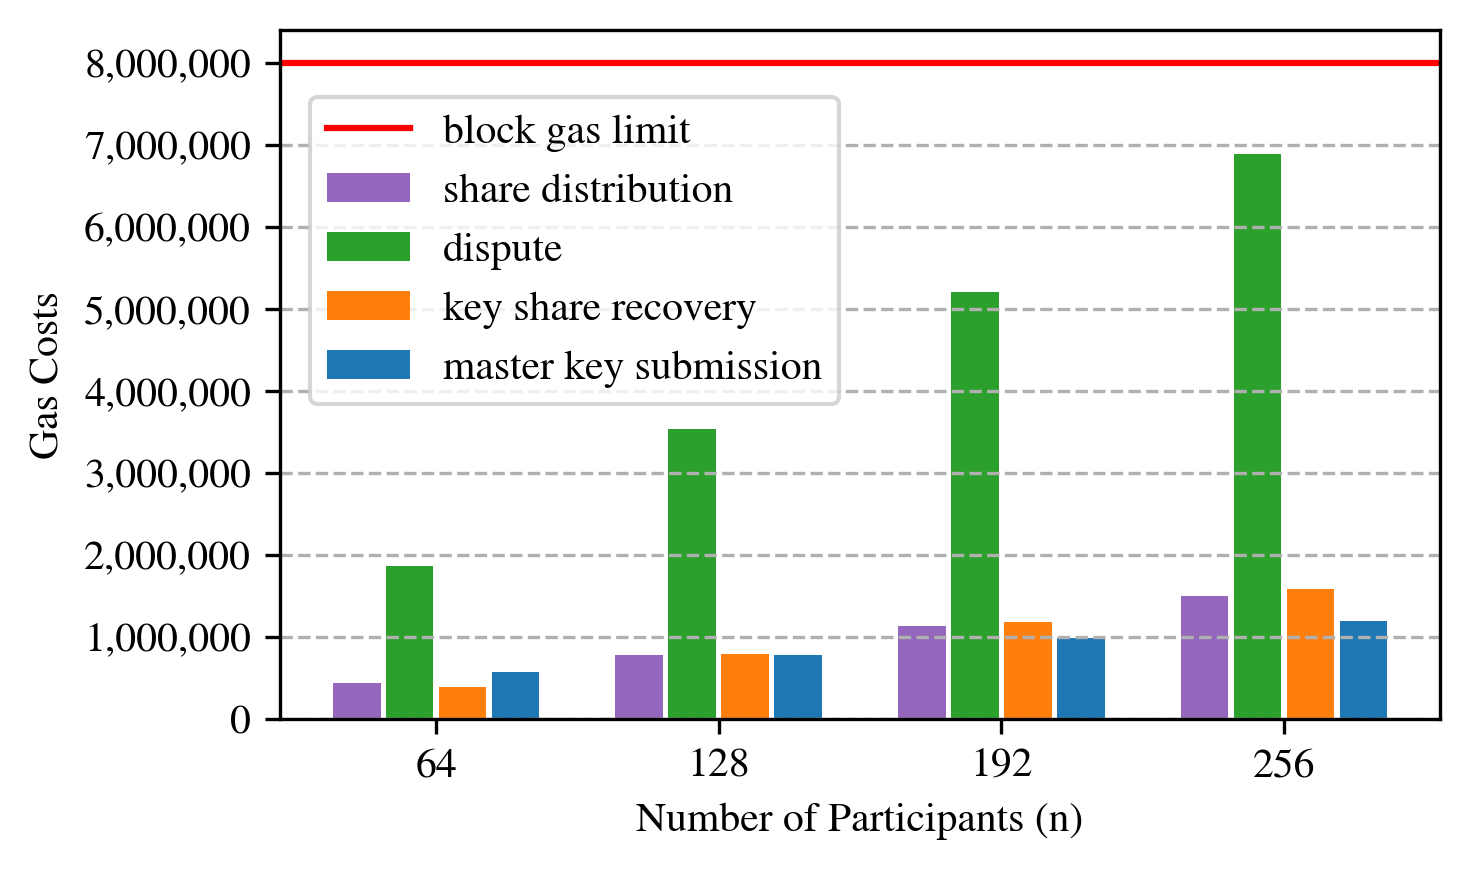

In [8]:
from cycler import cycler

plt.rcParams['axes.prop_cycle'] = cycler(color=
    [ 
        '#9467bd', 
        '#2ca02c', 
        '#ff7f0e', 
        '#1f77b4', 
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
    ]
)

labels = [8, 16, 32, 64, 128, 192, 256]
raw_data =  {
        "registration": [107457, 107521, 107521, 107521, 107457, 107521, 107457],
        "share distribution": [128704, 172713, 260636, 436737, 789894, 1143215, 1497403],
        "dispute": [405167, 614108, 1031681, 1866679, 3537362, 5210670, 6886217],
        "dispute, duplicate": [69062, 104661, 175672, 317393, 600333, 884589, 1169330],
        "key share submission": [517770, 517770, 517770, 517770, 517770, 517770, 517770],
        "key share recovery": [51980, 101448, 200346, 398443, 794364, 1190669, 1588254],
        "recovered key share submission": [517450, 517770, 517770, 517642, 517706, 517642, 517514],
        "recovered key share submission, duplicate": [
            41181,
            41245,
            41309,
            41181,
            41309,
            41181,
            41117,
        ],
        "master key submission": [395577, 421332, 472891, 576264, 783586, 992060, 1201366],
        "master key submission, duplicate": [30849, 30849, 30849, 30913, 30849, 30913, 30785],
    }


labels.pop(0)
labels.pop(0)
labels.pop(0)

for v in raw_data.values():
    v.pop(0)
    v.pop(0)
    v.pop(0)

x = np.arange(len(labels))  # the label locations
w = 0.75

fig, ax = plt.subplots(dpi=300, figsize=(5, 3))

cats = [
#    "registration",
    "share distribution",
    "dispute",
#    "key share submission",
    "key share recovery",
    "master key submission"     
]

for i, k in enumerate(cats):
    r = ax.bar(x - w/2  + w/len(cats) * (i + 0.5), raw_data[k], w/len(cats)*0.9, label=k)
    
xlims = ax.get_xlim()
plt.plot(xlims, [8_000_000]*2, color='red', label='block gas limit')
ax.set_xlim(xlims)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Participants (n)')
ax.set_ylabel('Gas Costs')

#ax.set_xticks(labels)
#ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#ax.set_xlim([-0.5, len(labels) - 0.5])

# ax.set_yscale('log')
# ax.set_yticks([50_000, 100_000, 200_000, 400_000, 800_000, 1_600_000, 3_200_000, 6_400_000])
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_yticks([i*1000000 for i in range(9)])
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)


plt.minorticks_off()
ax.yaxis.grid(which="major", linestyle='--')

# ax.set_title('xyz')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# ax.legend(ncol=2, bbox_to_anchor=(0.72, 0.65), loc=0)
ax.legend(bbox_to_anchor=(0.5, 0.68), loc=0)


fig.tight_layout()
plt.savefig('gas-costs.png', bbox_inches='tight', pad_inches=0)
# plt.savefig('gas-costs.pdf', bbox_inches='tight', pad_inches=0)
plt.show()
